In [1]:
from main import download_and_prepare_data

texts, fonts, hdris, materials = download_and_prepare_data()

ImportError: cannot import name 'imread_coords' from partially initialized module 'postprocess' (most likely due to a circular import) (f:\GbotHQ\Documents\GitHub\ocr-dataset-rendering\src\postprocess.py)

In [272]:
import importlib
import font_rendering
import generate_samples_2d
importlib.reload(font_rendering)
importlib.reload(generate_samples_2d)

<module 'generate_samples_2d' from 'f:\\GbotHQ\\Documents\\GitHub\\ocr-dataset-rendering\\src\\generate_samples_2d.py'>

In [2]:
from pathlib import Path as pth
from generate_samples_2d import generate_samples

root_dir = pth("Blender_3D_document_rendering_pipeline").resolve()
blender_path = "C:/Program Files/Blender Foundation/Blender 3.4/blender"
config_dir = (root_dir / "config").resolve()
output_dir = pth("../assets/output").resolve()

device = "CPU"

print("Generating samples...")
generated_samples = generate_samples(
    n_samples=2,
    device=device,
    output_image_resolution=(512, 512),
    compression_level=9,
    root_dir=root_dir,
    output_dir=output_dir,
    config_dir=config_dir,
    random_font_iter=fonts,
    random_hdri_iter=hdris,
    random_material_iter=materials,
    shuffled_dataset_iter=texts,
    threading=False
)

Generating samples...
C:\Users\GbotHQ\AppData\Local\Temp\tmpjx03kwwc


Generating samples:   0%|          | 0/2 [00:00<?, ?it/s]Got disconnected from remote data host. Retrying in 5sec [1/20]


'cmap'


Generating samples: 100%|██████████| 2/2 [09:32<00:00, 286.04s/it]


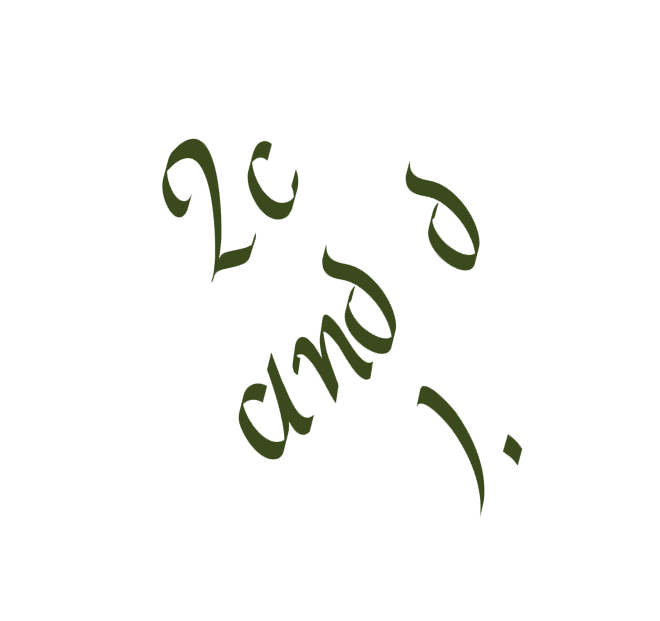

2c
and d
).


In [3]:
from random import choice

import numpy as np
import cv2 as cv
from PIL import Image

def imshow(img):
    if isinstance(img, np.ndarray):
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = Image.fromarray(img)
    display(img)

sample = choice(generated_samples)
img = cv.imread(str(sample.image_path))
imshow(img)
print(sample.text)

In [4]:
from shutil import rmtree
from blender_render_samples_3d import run_blender_command

def mkdir(path: pth):
    if path.is_dir():
        rmtree(path)
    path.mkdir(parents=True)

mkdir(output_dir)

run_blender_command(blender_path, output_dir, device)

Blender 3.4.0 (hash a95bf1ac01be built 2022-12-07 02:06:25)
Read blend: f:\GbotHQ\Documents\GitHub\ocr-dataset-rendering\src\./Blender_3D_document_rendering_pipeline\blender\scene.blend
WARN (bke.anim_sys): C:\Users\blender\git\blender-v340\blender.git\source\blender\blenkernel\intern\anim_sys.c:4192 BKE_animsys_eval_driver: invalid driver - modifiers["UVWarp"].offset[0]
Generating sample 1 of 2...
Fra:1 Mem:35.84M (Peak 51.84M) | Time:00:00.19 | Mem:0.00M, Peak:0.00M | Scene, main | Synchronizing object | paper
Fra:1 Mem:46.54M (Peak 51.84M) | Time:00:00.32 | Mem:0.00M, Peak:0.00M | Scene, main | Initializing
Fra:1 Mem:46.53M (Peak 51.84M) | Time:00:00.32 | Mem:0.00M, Peak:0.00M | Scene, main | Waiting for render to start
Fra:1 Mem:46.54M (Peak 51.84M) | Time:00:00.32 | Mem:0.00M, Peak:0.00M | Scene, main | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:46.54M (Peak 51.84M) | Time:00:00.32 | Mem:0.00M, Peak:0.00M | Scene, main | Updating Scene
Fra:1 Mem:46.54

In [210]:
import importlib
import bounding_box_math
import calculate_bounding_boxes
import postprocess
importlib.reload(bounding_box_math)
importlib.reload(calculate_bounding_boxes)
importlib.reload(postprocess)

<module 'calculate_bounding_boxes' from 'f:\\GbotHQ\\Documents\\GitHub\\ocr-dataset-rendering\\src\\calculate_bounding_boxes.py'>

{'overall_bbox': [[0.18359375, 0.4296875], [0.578125, 0.796875], [0.84765625, 0.546875], [0.458984375, 0.2265625]], 'axis_aligned_overall_bbox': [[0.18359375, 0.2265625], [0.84765625, 0.796875]], 'axis_aligned_overall_bbox_xxyy': [0.18359375, 0.84765625, 0.2265625, 0.796875], 'lines': {'2c': {'line_bbox': [[0.263671875, 0.37109375], [0.373046875, 0.470703125], [0.4921875, 0.376953125], [0.3828125, 0.283203125]], 'chars': {'2': {'char_index': 0, 'char_bbox': [[196, 126], [289, 219], [223, 285], [130, 191]]}, 'c': {'char_index': 1, 'char_bbox': [[175, 225], [226, 276], [187, 316], [136, 265]]}}}, 'and d': {'line_bbox': [[0.328125, 0.5625], [0.431640625, 0.662109375], [0.705078125, 0.4296875], [0.6015625, 0.34375]], 'chars': {'a': {'char_index': 3, 'char_bbox': [[409, 214], [467, 273], [410, 330], [351, 271]]}, 'n': {'char_index': 4, 'char_bbox': [[357, 278], [413, 334], [366, 381], [310, 325]]}, 'd': {'char_index': 7, 'char_bbox': [[193, 376], [278, 462], [239, 501], [153, 416]]}}}, ').'

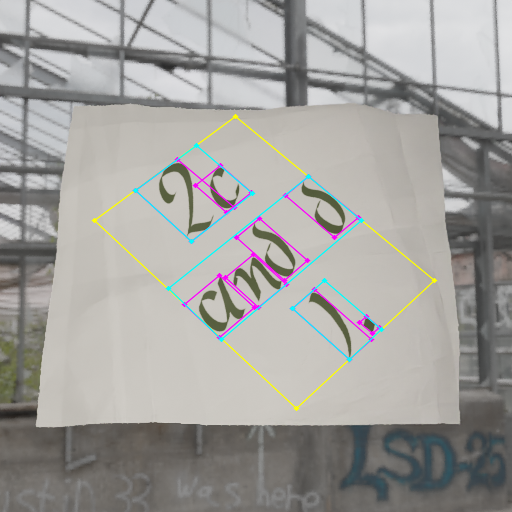

In [215]:
from calculate_bounding_boxes import calculate_bounding_boxes


sample = generated_samples[0]
bounding_boxes, new_char_bboxes, new_line_bboxes, new_overall_bbox = calculate_bounding_boxes(sample)

print(bounding_boxes)


# imshow(document_char_bboxes[0]["bbox"].draw(document_img))

tmp_out_img = cv.imread(str(sample.output_image_path))
tmp_out_img = new_overall_bbox.draw(tmp_out_img, (0, 255, 255))
for bbox in new_char_bboxes:
    tmp_out_img = bbox.draw(tmp_out_img, (255, 0, 255))
for bbox in new_line_bboxes:
    tmp_out_img = bbox.draw(tmp_out_img, (255, 255, 0))
imshow(tmp_out_img)

In [218]:
from postprocess import postprocess_samples

postprocess_samples(generated_samples)

In [219]:
print(generated_samples[0].bounding_boxes)

{'overall_bbox': [[0.18359375, 0.4296875], [0.578125, 0.796875], [0.84765625, 0.546875], [0.458984375, 0.2265625]], 'axis_aligned_overall_bbox': [[0.18359375, 0.2265625], [0.84765625, 0.796875]], 'axis_aligned_overall_bbox_xxyy': [0.18359375, 0.84765625, 0.2265625, 0.796875], 'lines': {'2c': {'line_bbox': [[0.263671875, 0.37109375], [0.373046875, 0.470703125], [0.4921875, 0.376953125], [0.3828125, 0.283203125]], 'chars': {'2': {'char_index': 0, 'char_bbox': [[196, 126], [289, 219], [223, 285], [130, 191]]}, 'c': {'char_index': 1, 'char_bbox': [[175, 225], [226, 276], [187, 316], [136, 265]]}}}, 'and d': {'line_bbox': [[0.328125, 0.5625], [0.431640625, 0.662109375], [0.705078125, 0.4296875], [0.6015625, 0.34375]], 'chars': {'a': {'char_index': 3, 'char_bbox': [[409, 214], [467, 273], [410, 330], [351, 271]]}, 'n': {'char_index': 4, 'char_bbox': [[357, 278], [413, 334], [366, 381], [310, 325]]}, 'd': {'char_index': 7, 'char_bbox': [[193, 376], [278, 462], [239, 501], [153, 416]]}}}, ').'

In [289]:
import time
from scipy.ndimage import map_coordinates
from postprocess import imread_coords, calculate_precise_bbox, to_float, to_uint
from font_rendering import get_tight_character_bbox
import numpy as np


sample = generated_samples[1]
output_img = cv.imread(str(sample.output_image_path))
document_img_shape = cv.imread(str(sample.image_path))
coords_relative, coords_absolute, _ = imread_coords(
    str(sample.output_coordinates_path), document_img_shape.shape
)

n_lines = len(sample.text.split("\n"))
line_masks = [np.zeros(coords_absolute.shape[1:], dtype=np.float32) for _ in range(n_lines)]

start = time.time()

document_char_bboxes = []
for k in sample.document_char_bboxes:
    bbox = k["bbox"]
    char_index = k["char_index"]
    line_index = k["line_index"]
    
    mask, mask_bbox = get_tight_character_bbox(sample.text[char_index], font)
    mask = mask[mask_bbox.points[0, 0]:mask_bbox.points[1, 0], mask_bbox.points[0, 1]:mask_bbox.points[1, 1]]

    h, w = np.array(mask.shape[:2]) - 1
    reference_rect = np.array([[0, 0], [h, 0], [h, w], [0, w]], dtype=np.float32)
    quad = bbox.points.astype(np.float32)
    quad[:2, 1] += 1
    quad[0, 0] += 1
    quad[3, 0] += 1
    
    transform_matrix = cv.getPerspectiveTransform(reference_rect[:, ::-1], quad[:, ::-1])
    mask = cv.warpPerspective(mask, transform_matrix, document_img_shape.shape[:2][::-1])

    labels_warped = map_coordinates(255 - mask, coords_absolute, cval=255)

    line_masks[line_index] += 1 - to_float(labels_warped)

    char_bbox, char_bbox_relative = calculate_precise_bbox(bbox, document_img_shape.shape, labels_warped, coords_relative)
    document_char_bboxes.append(char_bbox)

print(time.time() - start)

overall_mask = np.zeros(coords_absolute.shape[1:], dtype=np.float32)
for k in line_masks:
    overall_mask += k
overall_mask = 255 - to_uint(overall_mask)


line_masks = [255 - to_uint(k) for k in line_masks]


line_bboxes = []
for labels_warped, bbox in zip(line_masks, sample.document_line_bboxes):
    char_bbox, char_bbox_relative = calculate_precise_bbox(bbox, document_img_shape.shape, labels_warped, coords_relative)
    line_bboxes.append(char_bbox)

for bbox in line_bboxes:
    output_img = bbox.draw(output_img, (0, 255, 255))

for bbox in document_char_bboxes:
    output_img = bbox.draw(output_img, (255, 0, 255))
imshow(output_img)


# mask_warped = map_coordinates(mask, coords_absolute, cval=255)

# bbox_line_by_line, bbox_line_by_line_relative = calculate_precise_bbox(
#     sample.document_bbox, mask.shape, mask_warped, coords_relative
# )
# sample.bbox_line_by_line = bbox_line_by_line
# sample.bbox_line_by_line_relative = bbox_line_by_line_relative

# bbox, bbox_relative_xxyy = calculate_simple_bbox(mask_warped, coords_relative)
# sample.bbox = bbox
# sample.bbox_relative_xxyy = bbox_relative_xxyy

# sample.gaussian_blur_radius = apply_random_gaussian_blur_to_sample(
#     sample.output_image_path, sample.compression_level
# )

AttributeError: 'SampleInfo' object has no attribute 'document_char_bboxes'

## Visualize first few generated samples

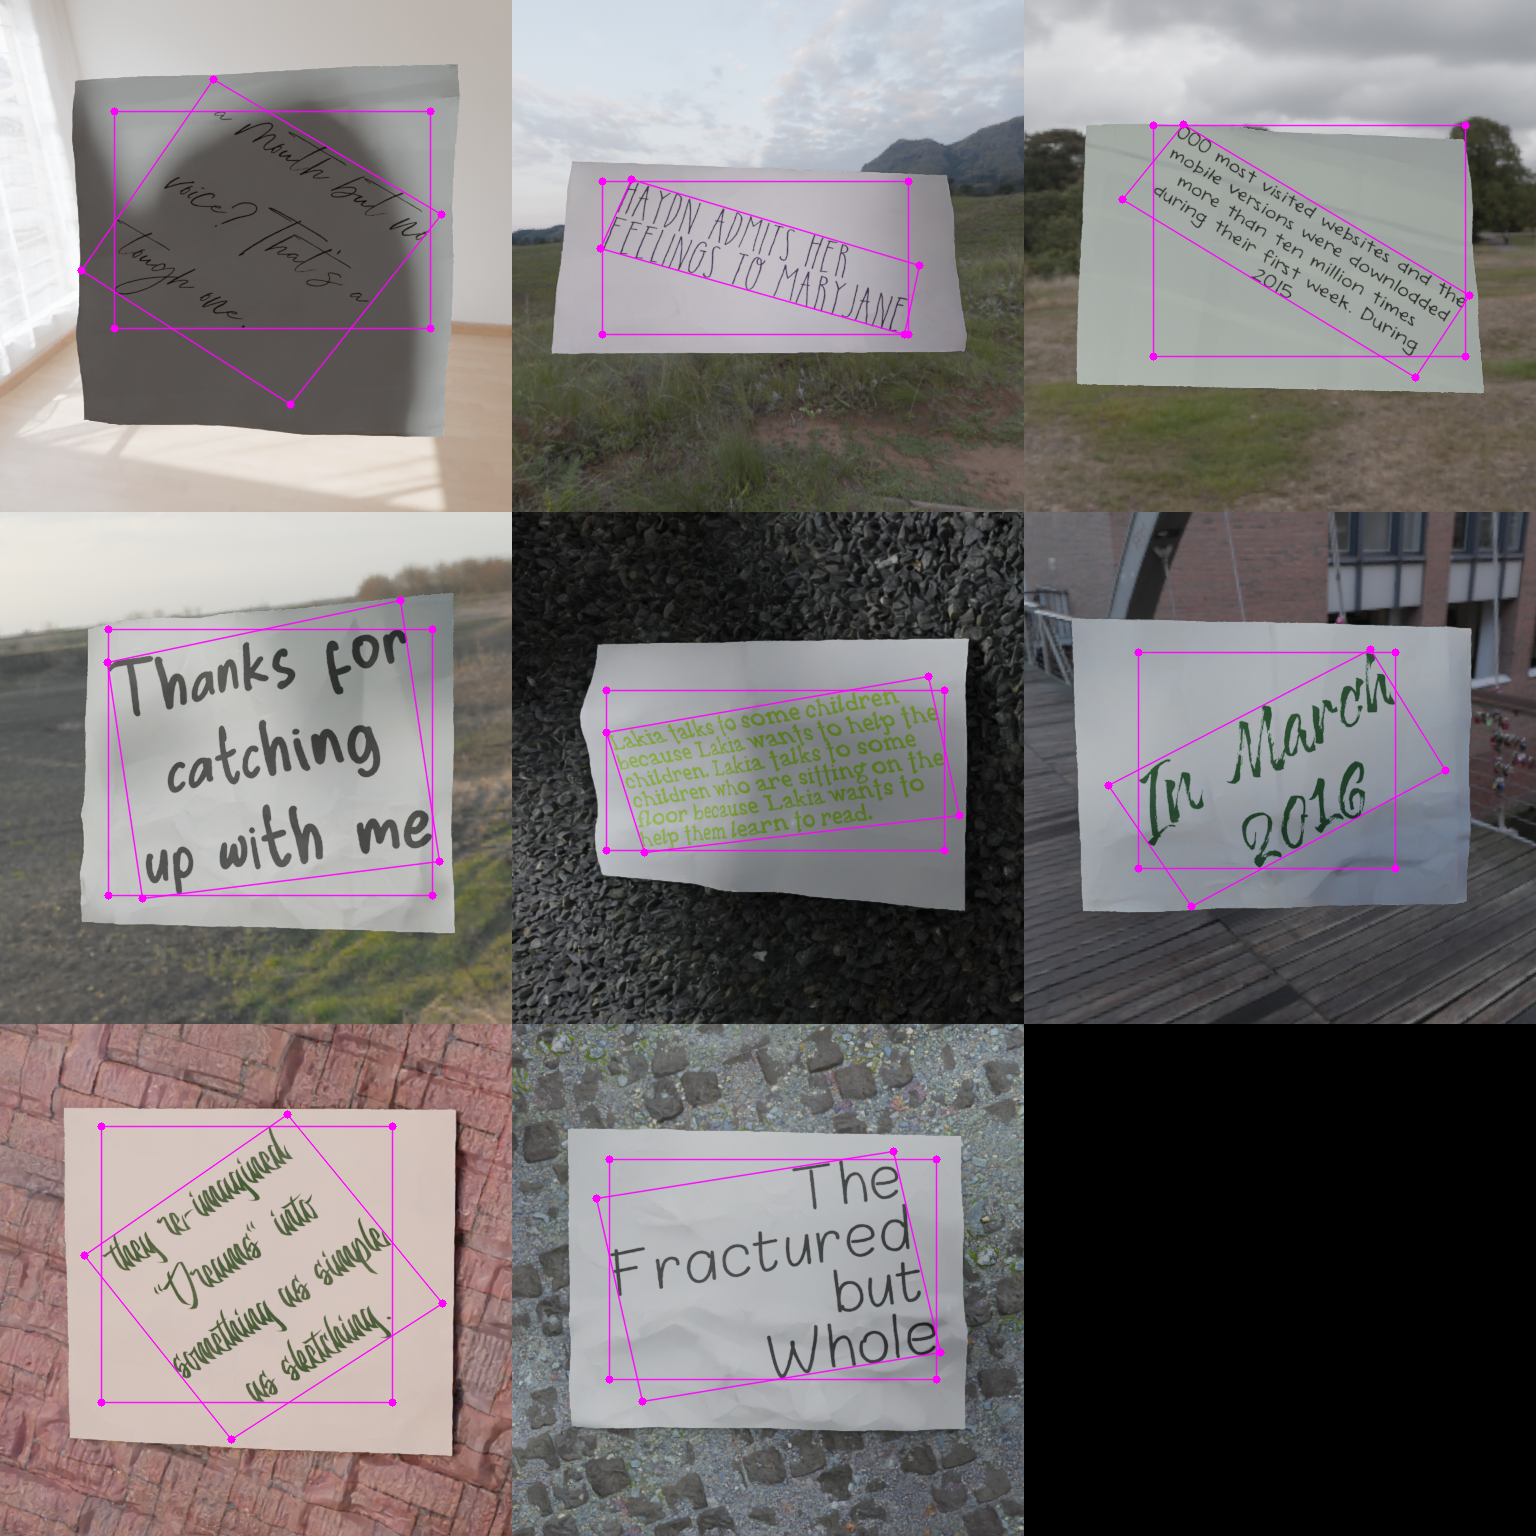

In [362]:
from postprocess import make_grid

count = min(len(generated_samples), 16)
output_imgs = [
    k.bbox_line_by_line.draw(k.bbox.draw(cv.imread(str(k.output_image_path)))) for k in generated_samples[:count]
]
imshow(make_grid(output_imgs))

In [4]:
!python main.py --help

INFO: Showing help with the command 'main.py -- --help'.

NAME
    main.py - Runs the main pipeline for rendering handwritten text on a virtual piece of paper using Blender. It downloads and prepares data for rendering 3D documents using Blender. It generates samples, renders them using Blender, and post-processes them. The generated samples are saved in the specified output directory.

SYNOPSIS
    main.py N_SAMPLES BLENDER_PATH OUTPUT_DIR DEVICE <flags>

DESCRIPTION
    Runs the main pipeline for rendering handwritten text on a virtual piece of paper using Blender. It downloads and prepares data for rendering 3D documents using Blender. It generates samples, renders them using Blender, and post-processes them. The generated samples are saved in the specified output directory.

POSITIONAL ARGUMENTS
    N_SAMPLES
        Type: int
        The number of sample images to generate.
    BLENDER_PATH
        Type: str
        The path to the Blender executable.
    OUTPUT_DIR
        Type: 

In [14]:
from shutil import rmtree
from pathlib import Path as pth

output_dir = "../assets/output"
if pth(output_dir).is_dir():
    rmtree(output_dir)

!python main.py --n_samples 8 --blender_path "C:/Program Files/Blender Foundation/Blender 3.4/blender.exe" --output_dir "$output_dir" --device "cpu" --resolution_x 512 --resolution_y 512 --compression_level 9

Preparing text dataset...


Generating samples:  12%|█▎        | 1/8 [00:05<00:38,  5.51s/it]4530 extra bytes in post.stringData array

Generating samples: 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]



Generating samples...
C:\Users\GbotHQ\AppData\Local\Temp\tmpyyfwq_y7
'cmap'
Rendering samples using Blender...
Blender 3.4.0 (hash a95bf1ac01be built 2022-12-07 02:06:25)
Read blend: f:\GbotHQ\Documents\GitHub\ocr-dataset-rendering\src\./Blender_3D_document_rendering_pipeline\blender\scene.blend
WARN (bke.anim_sys): C:\Users\blender\git\blender-v340\blender.git\source\blender\blenkernel\intern\anim_sys.c:4192 BKE_animsys_eval_driver: invalid driver - modifiers["UVWarp"].offset[0]
Generating sample 1 of 8...

Fra:1 Mem:123.07M (Peak 208.99M) | Time:00:00.82 | Mem:0.00M, Peak:0.00M | Scene, main | Synchronizing object | ground_plane
Fra:1 Mem:123.07M (Peak 208.99M) | Time:00:00.82 | Mem:0.00M, Peak:0.00M | Scene, main | Synchronizing object | paper
Fra:1 Mem:177.86M (Peak 208.99M) | Time:00:01.08 | Mem:0.00M, Peak:0.00M | Scene, main | Initializing
Fra:1 Mem:177.85M (Peak 208.99M) | Time:00:01.08 | Mem:0.00M, Peak:0.00M | Scene, main | Waiting for render to start
Fra:1 Mem:177.86M (Peak

In [3]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from bounding_box_math import bbox_from_mask

font_filepath = "tests/assets/SilentReaction.ttf"

# Load a font file
font = ImageFont.truetype(font_filepath, size=8)

# print(mask_array[bbox.points[0][0]:bbox.points[1][0], bbox.points[0][1]:bbox.points[1][1]])

In [43]:
from bounding_box import SimpleBoundingBox


def calculate_char_bboxes(xy, text, font):
    draw = ImageDraw.Draw(Image.new("RGB", (0, 0)))

    char_bboxes = []
    for i, char in enumerate(text):
        char_bbox = draw.textbbox(xy, text[i], font=font)
        width = char_bbox[2] - char_bbox[0]
        height = char_bbox[3] - char_bbox[1]

        if width == 0 or height == 0:
            continue

        mask, offset_bbox = get_tight_character_bbox(char, font)
        offset_bbox_size = offset_bbox.get_size()

        line_index = text[: i + 1].count("\n")

        char_bbox = draw.textbbox(xy, "\n" * line_index + text[i], font=font)
        bottom = char_bbox[3]

        char_bbox = draw.textbbox(xy, text[: i + 1].split("\n")[-1], font=font, align="right")
        right = char_bbox[2]

        bottom -= mask.shape[0] - offset_bbox.points[1][0]
        right -= mask.shape[1] - offset_bbox.points[1][1]
        top = bottom - offset_bbox_size[0]
        left = right - offset_bbox_size[1]

        char_bboxes.append(
            {
                "bbox": SimpleBoundingBox((top, left), (bottom, right)),
                "char_index": i,
                "line_index": line_index,
            }
        )
    return char_bboxes

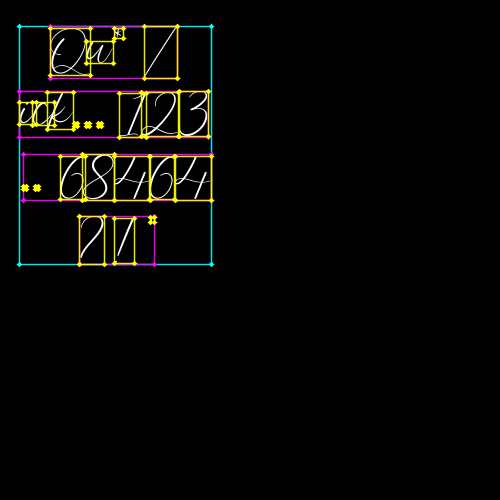

In [44]:
from PIL import Image, ImageDraw, ImageFont

image = Image.new("RGB", (500, 500))
font_size = 50

draw = ImageDraw.Draw(image)
# font = ImageFont.truetype(font_filepath, font_size)

xy = (20, 20)
text = """Qu* /
ick... 123
.. 68464
? ! '"""


def draw_text_aligned(draw, xy, text, font, align, **kwargs):
    text_bbox_with_padding = draw.textbbox((0, 0), text, font=font)
    line_offsets = []
    for i, line in enumerate(text.split("\n")):
        line_bbox_with_padding = draw.textbbox((0, 0), line, font=font)
        bottom = draw.textbbox((0, 0), "\n" * i + line, font=font)[3]

        if align == "left":
            left_offset = 0
        elif align == "center":
            left_offset = round(
                ((text_bbox_with_padding[2]) - (line_bbox_with_padding[2])) / 2
            )
        elif align == "right":
            left_offset = text_bbox_with_padding[2] - line_bbox_with_padding[2]
        else:
            raise ValueError("Invalid align value")

        line_offsets.append(left_offset)

        top = bottom - line_bbox_with_padding[3]
        anchor = (xy[0] + left_offset, xy[1] + top)
        draw.text(anchor, line, font=font, align="left", **kwargs)

    return line_offsets


align = "center"

line_offsets = draw_text_aligned(draw, xy, text, font, align)
# draw.text(xy, text, fill=(0, 0, 0), font=font, align=align)

document_char_bboxes = calculate_char_bboxes(xy, text, font)

for k in document_char_bboxes:
    left_offset = line_offsets[k["line_index"]]
    points = k["bbox"].points.astype(np.float32)
    points[:, 1] = points[:, 1] + left_offset
    k["bbox"].points = points.astype(np.int32)

line_bboxes = calculate_line_bboxes(document_char_bboxes)
document_overall_bbox = calculate_overall_bbox(line_bboxes)

image = np.array(image)
image = document_overall_bbox.draw(image, (0, 255, 255))

for bbox in line_bboxes:
    image = bbox.draw(image, (255, 0, 255))

for k in document_char_bboxes:
    image = k["bbox"].draw(image, (255, 255, 0))

image = Image.fromarray(image)

display(image)